<a href="https://colab.research.google.com/github/fergartor/IDAL_IA3_FGarciaTrorres/blob/main/Sea_Ice_Extent.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


### Climate Change and Sea Ice Extent

We want to answer the question: Has there been a decrease in the amount of ice in the last years?

For that we will use the sea ice extent measurements (in millions of square km) from the [National Snow & Ice Data Center](https://nsidc.org).

We perform the following processing steps:
1. Read and clean the data.
2. Normalize the Sea Ice Extent (SIE) data and visualize its temporal trend.
3. Compute the SIE temporal trend as a simple linear regression (OLS) and quantitatively evaluate it.
4. Estimate the sea ice extent for 2025.


### 1. Read and clean the data.
Load the monthly sea ice extent (SIE) monthly data provided in the file 'SeaIce.txt'. Note variables ``extent`` (SIE) and ``area`` should be greater or equal than zero. Detect possible outliers and clean the data.  

In [ ]:
# Importamos el archivo txt como dataframe
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd 

df = pd.read_fwf('SeaIce.txt')
df


,year,mo,data_type,region,extent,area
0,1979,1,Goddard,N,15.54,12.33
1,1980,1,Goddard,N,14.96,11.85
2,1981,1,Goddard,N,15.03,11.82
3,1982,1,Goddard,N,15.26,12.11
4,1983,1,Goddard,N,15.10,11.92
...,...,...,...,...,...,...
419,2009,12,Goddard,N,12.51,10.25
420,2010,12,Goddard,N,12.02,10.08
421,2011,12,Goddard,N,12.40,10.28
422,2012,12,Goddard,N,12.20,10.11


We show the 'area' data:

In [ ]:
areas = df['area']
areas

0      12.33
1      11.85
2      11.82
3      12.11
4      11.92
       ...  
419    10.25
420    10.08
421    10.28
422    10.11
423    10.48
Name: area, Length: 424, dtype: float64

'Area' values should be greater or equal to zero, so we can see two outliers if we represent that variable:


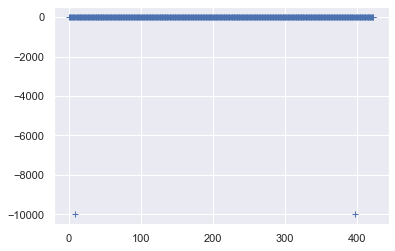

In [ ]:
plt.plot(range(0,424), areas, 'b+')
plt.show()

In [ ]:
# Visualizamos los datos con 'area' menor o igual a cero
df[df['area']<=0]

,year,mo,data_type,region,extent,area
9,1988,1,-9999,N,-9999.0,-9999.0
397,1987,12,-9999,N,-9999.0,-9999.0


We also show the 'extent' data:

In [ ]:
sie = df['extent']
sie

0      15.54
1      14.96
2      15.03
3      15.26
4      15.10
       ...  
419    12.51
420    12.02
421    12.40
422    12.20
423    12.38
Name: extent, Length: 424, dtype: float64

'Extent' values should be greater or equal to zero, so we can see two outliers if we represent that variable:

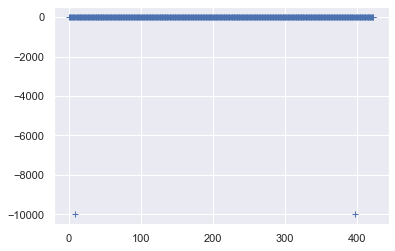

In [ ]:
plt.plot(range(0,424), sie, 'b+')
plt.show()

In [ ]:
# Visualizamos los datos con 'extent' menor o igual a cero
df[df['extent']<=0]

,year,mo,data_type,region,extent,area
9,1988,1,-9999,N,-9999.0,-9999.0
397,1987,12,-9999,N,-9999.0,-9999.0


With the identified outliers (indexes 9 and 397), we can clean up the data:

In [ ]:
df = df.drop(df[df['extent']<=0].index)
df

,year,mo,data_type,region,extent,area
0,1979,1,Goddard,N,15.54,12.33
1,1980,1,Goddard,N,14.96,11.85
2,1981,1,Goddard,N,15.03,11.82
3,1982,1,Goddard,N,15.26,12.11
4,1983,1,Goddard,N,15.10,11.92
...,...,...,...,...,...,...
419,2009,12,Goddard,N,12.51,10.25
420,2010,12,Goddard,N,12.02,10.08
421,2011,12,Goddard,N,12.40,10.28
422,2012,12,Goddard,N,12.20,10.11


In [ ]:
np.sum(df['area']<=0)

0

### 2. Normalize the SIE data and visualize its temporal trend.

Visualize there is a monthly dependence of SIE, explore the linear relationship using ``lmplot``.
Compute the mean and variance of SIE for each month.

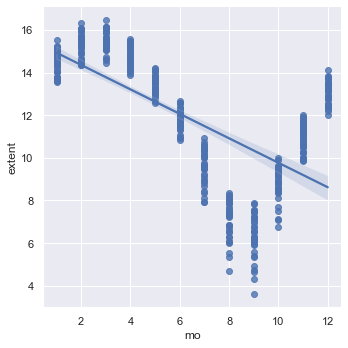

In [ ]:
# We explore the dependence and linear relationship using lmplot
import seaborn as sns; sns.set_theme(color_codes=True)
g = sns.lmplot(x='mo', y='extent', data=df)

In [ ]:
# Mean of SIE for each month
df_mean = df.groupby('mo').mean()
SIE_mean = df_mean['extent']
SIE_mean

mo
1     14.479429
2     15.298889
3     15.491714
4     14.766000
5     13.396000
6     11.860000
7      9.601143
8      7.122286
9      6.404857
10     8.809143
11    10.964722
12    13.059429
Name: extent, dtype: float64

In [ ]:
# Variance of SIE for each month
df_var = df.groupby('mo').var()
SIE_var = df_var['extent']
SIE_var

mo
1     0.304906
2     0.295804
3     0.237209
4     0.215378
5     0.189901
6     0.247918
7     0.679175
8     0.824577
9     1.143902
10    0.630361
11    0.412511
12    0.284870
Name: extent, dtype: float64

Normalize the SIE data: subtract the monthly mean and then convert to percent difference by dividing by the monthly mean and then multiplying by 100. Use the normalized SIE for the rest of the exercise.

In [ ]:
for i in range(1,13):
    df['extent'][df.mo==i] = ((df['extent'][df.mo==i] - SIE_mean[i])/SIE_mean[i])*100
      
df

/var/folders/_w/mpjdphmd4653l152t3ng6kw00000gn/T/ipykernel_30576/1807454728.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['extent'][df.mo==i] = ((df['extent'][df.mo==i] - SIE_mean[i])/SIE_mean[i])*100


,year,mo,data_type,region,extent,area
0,1979,1,Goddard,N,7.324677,12.33
1,1980,1,Goddard,N,3.318994,11.85
2,1981,1,Goddard,N,3.802439,11.82
3,1982,1,Goddard,N,5.390899,12.11
4,1983,1,Goddard,N,4.285883,11.92
...,...,...,...,...,...,...
419,2009,12,Goddard,N,-4.207141,10.25
420,2010,12,Goddard,N,-7.959219,10.08
421,2011,12,Goddard,N,-5.049444,10.28
422,2012,12,Goddard,N,-6.580905,10.11


Visualize the trend of SIE per year considering:1) all months, 2) January, 3) August

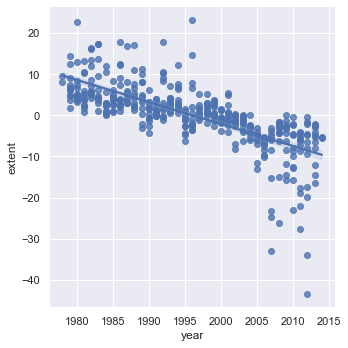

In [ ]:
# All months
import seaborn as sns; sns.set_theme(color_codes=True)
g = sns.lmplot(x='year', y='extent', data=df)

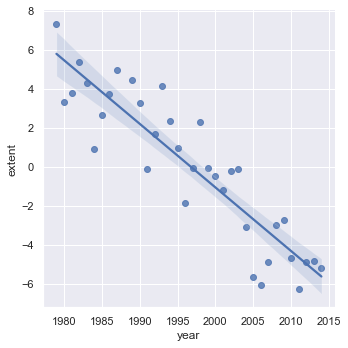

In [ ]:
# January
import seaborn as sns; sns.set_theme(color_codes=True)
g = sns.lmplot(x='year', y='extent', data=df[df.mo==1])

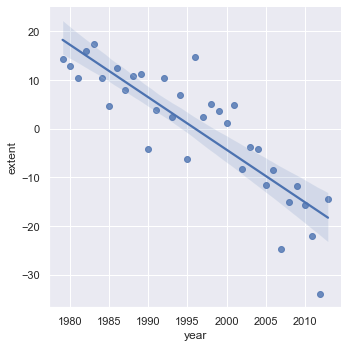

In [ ]:
# August
import seaborn as sns; sns.set_theme(color_codes=True)
g = sns.lmplot(x='year', y='extent', data=df[df.mo==8])

Calculate the Pearson correlation coefficient and the p-value for testing non-correlation of the SIE temporal trend (consider all months). Is it significant?

In [ ]:
import scipy
Pcorr, pvalue = scipy.stats.pearsonr(df['year'], df['extent'])
print(f"El coeficiente de correlación de Pearson resulta ser de {Pcorr}, con un p-value de {pvalue}, y con ese p-value podemos considerarlo como significativo")

El coeficiente de correlación de Pearson resulta ser de -0.7157818838300495, con un p-value de 1.730642447159393e-67, y con ese p-value podemos considerarlo como significativo


### 3. Compute the trend as a simple linear regression (OLS) and quantitatively evaluate it.

Provide the estimated parameters for the linear regression. 
Evaluate the quality of fit quantitatively and graphically.

In [ ]:
df_m = df.groupby('year').mean()
SIE_my = df_m['extent']

In [ ]:
#your solution here
from sklearn.linear_model import LinearRegression
X = np.array(SIE_my.index).reshape((-1, 1))
Y = np.array(SIE_my)
model = LinearRegression()
model.fit(X, Y)
r_sq = model.score(X,Y)
r_sq

0.8537416786079789

In [ ]:
b0 = model.intercept_
b0

1033.7684434308728

In [ ]:
b1 = model.coef_
b1

array([-0.51786798])

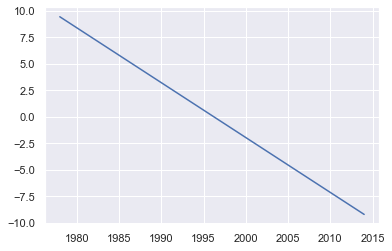

In [ ]:
import matplotlib.pyplot as plt

y = b1* X + b0

#plt.scatter(X, y)
plt.plot(X,y)
plt.show()

### 4. Estimate the sea ice extent for January 2025

 Is there a negative trend in the evolution of sea ice extent over recent years? 

In [ ]:
prediction = np.arange(2015,2026,1).reshape(-1,1)
prediction

array([[2015],
       [2016],
       [2017],
       [2018],
       [2019],
       [2020],
       [2021],
       [2022],
       [2023],
       [2024],
       [2025]])

In [ ]:
model.predict(prediction)

array([ -9.73554632, -10.2534143 , -10.77128229, -11.28915027,
       -11.80701826, -12.32488624, -12.84275423, -13.36062221,
       -13.8784902 , -14.39635818, -14.91422617])

In 2025 the mean normalized SIE would be -14.91422617